## Calling all the data from the API 

This is the website where the data was obtained from: https://aviationstack.com/

This paid service provides you the airline routes with some limitation on the amount of data I can get.
The aviationstack API is capable of providing data about airline routes, updated every 24 hours. In order to get airline route data, the API's routes endpoint along with a series of optional parameters to filter results were used.

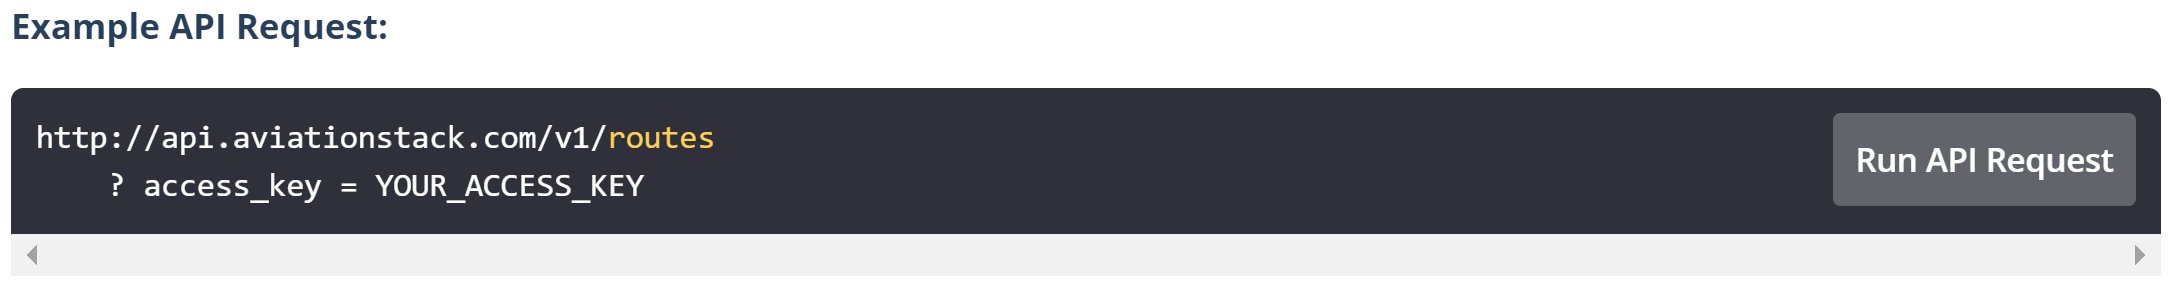

Since there is a lot of data available on flights from each airport, I limited the data collection only to one carrier, which is KLM, and one Airport, which is Schiphol.

Based on the Get Request parameters that is in aviationstack API documentation I requested the parameters I wanted for my project. 

In [ ]:
ACCESS_KEY = '5549b7cfa9f1385105d5dc9de3673240'
AIRPORT ='AMS'
AIRLINE = 'KLM'
FLIGHT_URL = 'https://api.aviationstack.com/v1/flights'
ARRIVAL_FOLDER_LOCATION = '../flight_data/2020/arr'
DEPARTURE_FOLDER_LOCATION = '../flight_data/2020/dep'

In [ ]:
import requests
import json
import datetime 

def get_flight_response(flight_url, flight_params):
    
    if flight_url is None or flight_params is None:
        raise ValueError("The values provided are not correct")
    else:
        print(flight_params)
        api_result = requests.get(flight_url, flight_params)
        api_response = api_result.json()
        return api_response

def get_dep_flight_response(dep_flight_date):
    if dep_flight_date is None:
        raise ValueError("Flight date value is not correct")
    else: 
        departure_params = {'access_key': ACCESS_KEY, 'flight_date':dep_flight_date, 'dep_iata':AIRPORT, 'airline_name':AIRLINE}
        return get_flight_response(FLIGHT_URL, departure_params)
        
        
def get_arr_flight_response(arr_flight_date):
    if arr_flight_date is None:
        raise ValueError("Flight date value is not correct")
    else: 
        arrival_params = {'access_key': ACCESS_KEY, 'flight_date':arr_flight_date, 'arr_iata':AIRPORT, 'airline_name':AIRLINE}
        return get_flight_response(FLIGHT_URL, arrival_params)        
        

def save_flight_json_file(flight_folder, flight_month, flight_date, flight_json):
    full_folder_path = flight_folder + '/' + flight_month + '/' + flight_date + '.json'
    with open(full_folder_path, 'w') as json_file: json.dump(flight_json, json_file)
    return


# start date and end date
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime.now()        

from datetime import date, timedelta
delta = timedelta(days=1) 
while start_date <= end_date: 
    current_date = start_date.strftime("%Y-%m-%d")
    current_month = start_date.strftime("%m")
    print(current_date)
    print(current_month)
        
    #result = get_dep_flight_response(current_date)
    
    #save_flight_json_file(DEPARTURE_FOLDER_LOCATION, current_month, current_date, result)
    
    result = get_arr_flight_response(current_date)
    
    save_flight_json_file(ARRIVAL_FOLDER_LOCATION, current_month, current_date, result)
        
    start_date += delta  
    
    